<a href="https://colab.research.google.com/github/ccasado/bootcamp-dados/blob/main/BootcampDados_Aula3_Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", engine='python', skipfooter=12,
                    thousands=".", decimal=",")




In [2]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.drop("Total", axis=1)

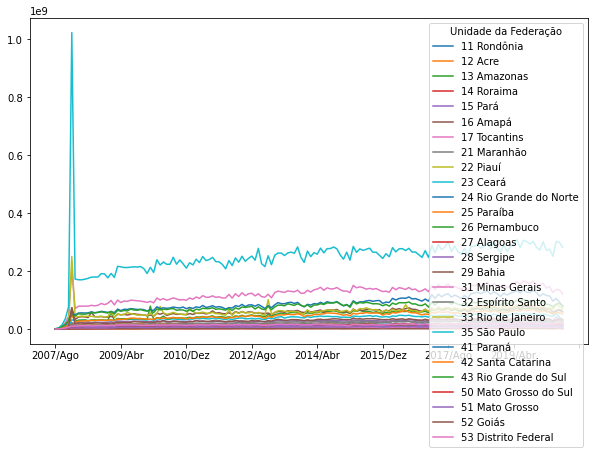

In [3]:
usaveis.T.plot(figsize=(10,6))

###Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.

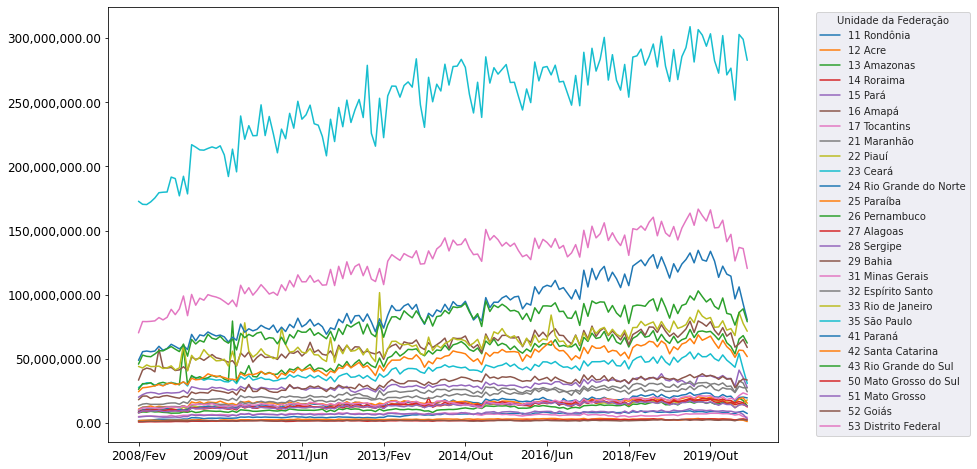

In [4]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.set_style('dark')
sns.set_palette(sns.color_palette("gist_rainbow", 27))
usaveis.iloc[:,6:].T.plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Unidade da Federação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

###Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Sudeste e Centro-Oeste) de cada estado.

In [5]:
regioes = []
for estados in usaveis.index:
  if estados.startswith('1'):
    regioes.append('Norte')
  elif estados.startswith('2'):
    regioes.append('Nordeste')
  elif estados.startswith('3'):
    regioes.append('Sudeste')
  elif estados.startswith('4'):
    regioes.append('Sul')
  else:
    regioes.append('Centro-Oeste')

usaveis.insert(0, 'Regiões', regioes)

usaveis

,Regiões,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,Norte,4209.37,16397.03,133645.19,346912.84,711758.31,1.829560e+06,1.940793e+06,1.955722e+06,2.143354e+06,2.280383e+06,2.624543e+06,2.973421e+06,2.938286e+06,2.843931e+06,2.878153e+06,2.780023e+06,2.651805e+06,3.147566e+06,3.082108e+06,4.190355e+06,4.040252e+06,3.946424e+06,3.372378e+06,3.720609e+06,3.787323e+06,3.679370e+06,3.866147e+06,3.667809e+06,3.633472e+06,3.812316e+06,3.911776e+06,4.663061e+06,4.524545e+06,4.778755e+06,4.369733e+06,4.632439e+06,4.464307e+06,4.668642e+06,4.490368e+06,...,8.133489e+06,8.140639e+06,8.041249e+06,8.199033e+06,8.363386e+06,7.889820e+06,8.603944e+06,8.048398e+06,8.159737e+06,8.457456e+06,7.766983e+06,8.858846e+06,8.407076e+06,9.492939e+06,8.206196e+06,9.011613e+06,9.124968e+06,8.406733e+06,8.411360e+06,8.651082e+06,8.193426e+06,8.388269e+06,8.645316e+06,9.050329e+06,9.211263e+06,9.490545e+06,8.600886e+06,8.919191e+06,8.909112e+06,8.409386e+06,8.924348e+06,8.948606e+06,8.660753e+06,8.326416e+06,8.413784e+06,7.174312e+06,7.423679e+06,8.581195e+06,9.193594e+06,7.407388e+06
12 Acre,Norte,10470.07,14001.71,86200.85,301323.68,769612.36,1.731745e+06,1.743979e+06,2.057439e+06,2.057830e+06,2.226578e+06,2.112577e+06,2.029128e+06,1.886872e+06,2.084885e+06,2.230838e+06,2.122013e+06,2.196652e+06,2.152239e+06,2.086776e+06,2.476364e+06,2.396888e+06,2.610262e+06,2.174098e+06,2.051885e+06,1.714708e+06,1.341532e+06,2.288459e+06,2.462713e+06,2.254900e+06,2.381536e+06,2.079981e+06,2.564838e+06,2.588318e+06,2.538526e+06,2.319786e+06,2.279157e+06,2.454599e+06,2.578924e+06,2.625443e+06,...,2.811365e+06,3.161447e+06,3.355223e+06,3.562692e+06,3.375297e+06,3.341498e+06,3.358378e+06,3.145385e+06,2.638774e+06,2.968169e+06,2.769797e+06,3.057632e+06,2.874965e+06,3.175575e+06,3.060903e+06,3.253012e+06,3.040645e+06,2.926179e+06,3.126121e+06,2.473455e+06,2.277493e+06,2.594347e+06,2.234388e+06,2.473008e+06,2.979765e+06,3.070534e+06,3.249053e+06,3.567539e+06,2.981073e+06,2.998860e+06,3.293379e+06,3.174249e+06,2.959569e+06,3.261124e+06,2.981264e+06,2.859102e+06,2.472063e+06,2.383895e+06,2.199921e+06,1.163813e+06
13 Amazonas,Norte,35752.72,45570.64,416012.30,2020381.79,5949408.99,1.141921e+07,7.934652e+06,8.641517e+06,8.531576e+06,9.079902e+06,8.646296e+06,8.755806e+06,8.331764e+06,8.148090e+06,7.681661e+06,7.761445e+06,7.764783e+06,8.607223e+06,8.385963e+06,9.207129e+06,8.160517e+06,8.562322e+06,9.484999e+06,9.465069e+06,9.267007e+06,9.092824e+06,9.218407e+06,8.674068e+06,8.365788e+06,9.386945e+06,8.373049e+06,1.032115e+07,9.990164e+06,9.767161e+06,9.151838e+06,9.140197e+06,9.437224e+06,9.742680e+06,9.996686e+06,...,1.371783e+07,1.390957e+07,1.371883e+07,1.439621e+07,1.374530e+07,1.397979e+07,1.389552e+07,1.351812e+07,1.363519e+07,1.454945e+07,1.275356e+07,1.474941e+07,1.457793e+07,1.538106e+07,1.465365e+07,1.554460e+07,1.637496e+07,1.534334e+07,1.624996e+07,1.425541e+07,1.427405e+07,1.535891e+07,1.410007e+07,1.610397e+07,1.615449e+07,1.652998e+07,1.550998e+07,1.664222e+07,1.649372e+07,1.534632e+07,1.628244e+07,1.478133e+07,1.492338e+07,1.593956e+07,1.513811e+07,1.477374e+07,1.633091e+07,1.944115e+07,1.750933e+07,1.335851e+07
14 Roraima,Norte,4785.91,11858.63,43852.67,369328.51,470676.43,8.084484e+05,7.7168

###Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)


###Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente


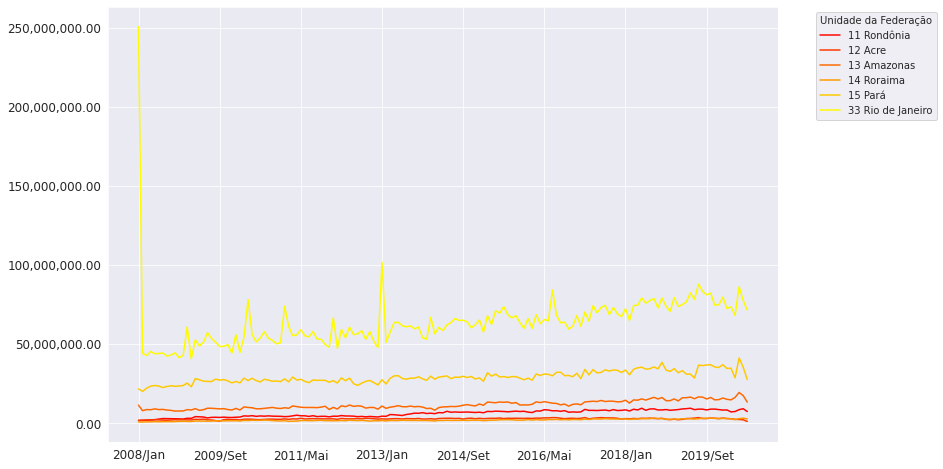

In [6]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette("gist_rainbow", 27))
usaveis.loc[['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará', '33 Rio de Janeiro']].iloc[:,6:].T.plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Unidade da Federação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



### Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue


A transmissão da dengue no Brasil teve início na década de 1980 e desde sua introdução vem ocorrendo de forma continuada, intercalando-se com epidemias.

A Dengue reemergiu no município do Rio de Janeiro em 1986, e a partir deste ano a doença se tornou endêmica, apresentando anos epidêmicos. 

Os principais anos epidêmicos foram: 1986, 1991, 2002, 2008 e 2012.

Dados do último boletim epidemiológico do Ministério da Saúde revelam que foram contabilizados mais de 979 mil casos suspeitos de dengue no Brasil ao longo de 2020.

###Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

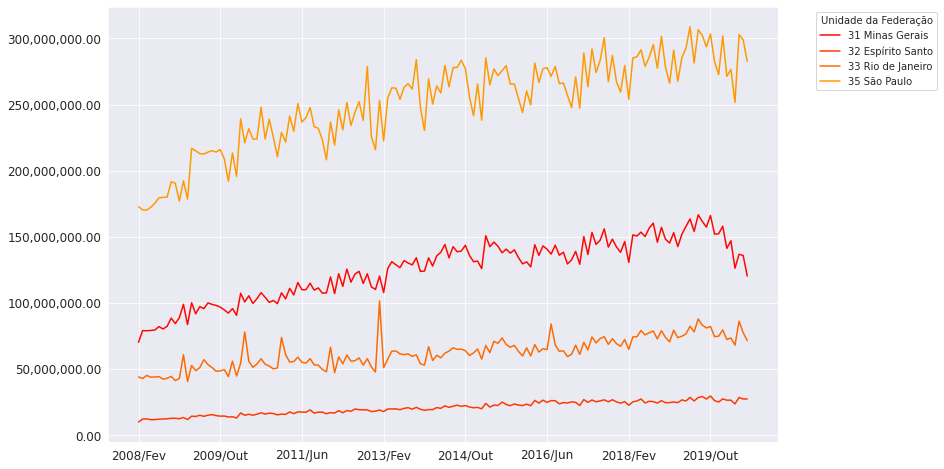

In [7]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette("gist_rainbow", 27))
cd = usaveis.loc[usaveis['Regiões'] == 'Sudeste']
cd = cd.drop(['Regiões'], axis=1)
cd.iloc[:,6:].T.plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Unidade da Federação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

###Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

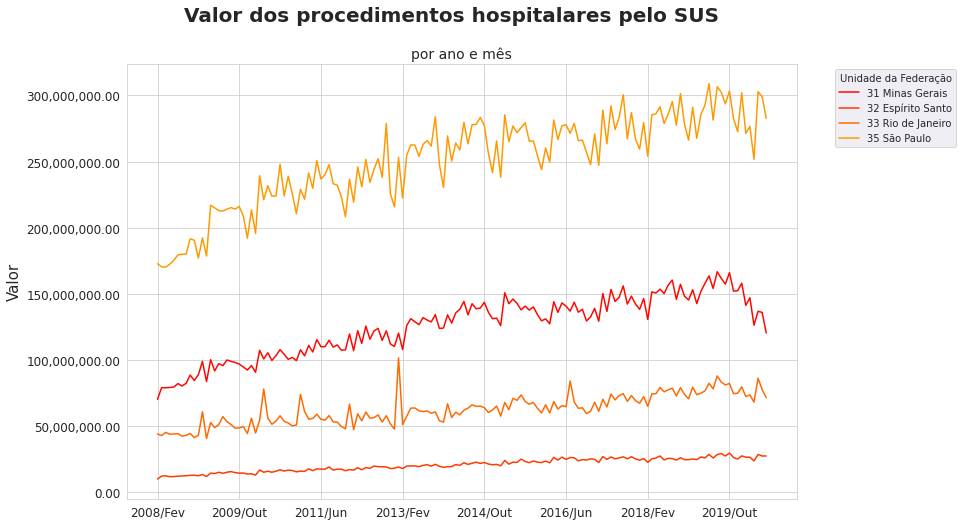

In [8]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette("gist_rainbow", 27))
cd = usaveis.loc[usaveis['Regiões'] == 'Sudeste']
cd = cd.drop(['Regiões'], axis=1)
cd.iloc[:,6:].T.plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.suptitle("Valor dos procedimentos hospitalares pelo SUS", size=20, weight='bold' )
plt.title("por ano e mês", size=14)
plt.ylabel('Valor', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Unidade da Federação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

O gráfico acima demonstra os valores gastos em procedimentos hospitalares pelo SUS e repassados para os gestores das unidades da federação na região Sudeste no período de Fevereiro de 2008 a Outubro de 2019. O gasto em São Paulo é evidentemente maior em relação aos outros estados, o que se justifica pois é o estado com a maior número de habitantes, representando 21.9% da população total do país, seguido por Minas Gerais com 10,1% e Rio de Janeiro com 8.2%, segundo o IBGE. As linhas demonstram um comportamento sazonal, sendo mais evidente em São Paulo e Rio de Janeiro. Especificamente no Rio de Janeiro, houve um pico de utilização da verba em 2012, que pode ser justificado pelo ano epidêmico de dengue nesse estado.